# Exploratory Data Analysis

##### Explaration and analysis on cryptocurrencies


The purpose of this EDA is to deliver a clear understandind about cryptucurrencies so that you will have a better idea to make decisions when investing in this "universe"

This notebook imports csv files exported from [coin gecko](https://www.coingecko.com/es/api/documentation). You can check all the ETL work behind in etl_for_eda.ipynb

This begins from ploting only price, market capitalization, and total volumes across time. Due to my limited familarity with the topic, as well as time and tasks administration, this only focused on the feature mentioned.

- Price: is the value once the coin is appraised in specifict period of time.
- Market capitalization: the coins in circulation supply multiplied by the crypto coin price.
- Total Volume: It represents the total amount of a specific cryptocurrency traded on exchanges within a certain period of time




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
bitcoin_df  =  pd.read_csv("data/bitcoin_df.csv", index_col=0)
ethereum_df  =  pd.read_csv("data/ethereum_df.csv", index_col=0)
tether_df  =  pd.read_csv("data/tether_df.csv", index_col=0)
binancecoin_df  =  pd.read_csv("data/binancecoin_df.csv", index_col=0)
ripple_df  =  pd.read_csv("data/ripple_df.csv", index_col=0)
usd_coin_df  =  pd.read_csv("data/usd_coin_df.csv", index_col=0)
staked_ether_df  =  pd.read_csv("data/staked_ether_df.csv", index_col=0)
cardano_df  =  pd.read_csv("data/cardano_df.csv", index_col=0)
solana_df  =  pd.read_csv("data/solana_df.csv", index_col=0)
dogecoin_df  =  pd.read_csv("data/dogecoin_df.csv", index_col=0)

Here I will just try data, how it plots

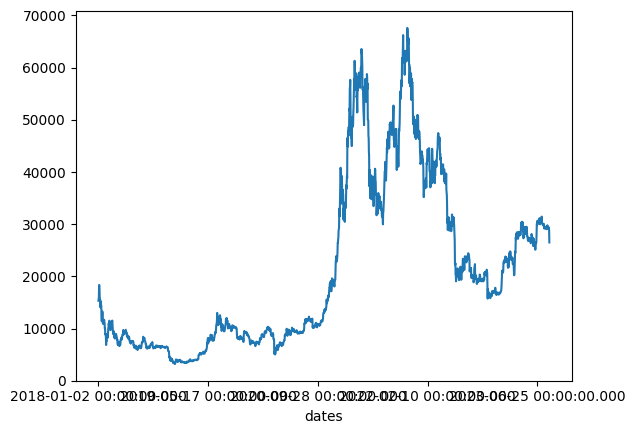

In [72]:
bitcoin_df.set_index("dates", drop=True)["prices"].plot();

<Axes: >

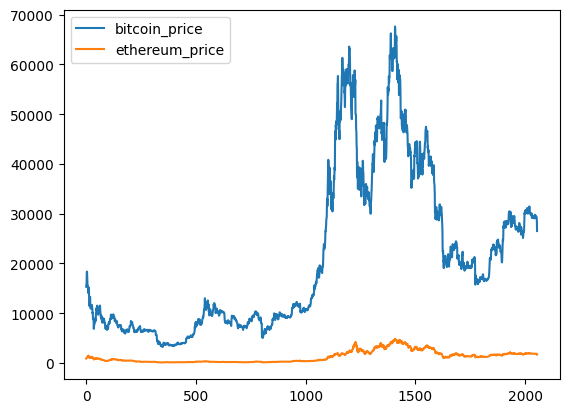

In [73]:
pd.concat([bitcoin_df["prices"].rename("bitcoin_price"), ethereum_df["prices"].rename("ethereum_price")], axis=1).plot()

# Filling date for continuity


If we were to attempt to filter through dates.. maybe there will some missing dates in the linspace.. for example the crupto currency solana has some dates missing..

In [74]:
def linspace_for_dates(base_date:str, number_of_days:int):
    """
    Generate a list of dates starting from a base date and extending for a specified number of days.

    This function creates a sequence of dates starting from the provided base date and extending for the given number of days.
    
    Parameters:
        base_date (str): The starting date in the format 'YYYY-MM-DD'.
        number_of_days (int): The number of days to generate in the sequence.

    Returns:
        list: A list of dates in 'YYYY-MM-DD' format.

    Example:
        base_date = "2023-01-01"
        num_days = 30
        date_sequence = linspace_for_dates(base_date, num_days)
    """


    base_date = pd.to_datetime(base_date)  # Replace with your desired start date
    num_days = number_of_days  # Number of days
    step_size = np.timedelta64(1, 'D')  # 1 day

    date_linspace = base_date + np.arange(num_days) * step_size

    date_linspace = pd.DataFrame(date_linspace).rename(columns={0:"dates"})

    # .dt.date to only take dates and not time.
    return pd.DataFrame(date_linspace["dates"].dt.date) 

In [75]:
# This is the linespace of time that it is going to be used for plot accross dates
date_linspace = (linspace_for_dates("2018-01-01", 2054))

In [76]:
# Exporting the files already created from the prior ETL

bitcoin_df["dates"] = pd.to_datetime(bitcoin_df["dates"]).dt.date 
ethereum_df["dates"] = pd.to_datetime(ethereum_df["dates"]).dt.date
tether_df["dates"] = pd.to_datetime(tether_df["dates"]).dt.date
binancecoin_df["dates"] = pd.to_datetime(binancecoin_df["dates"]).dt.date
ripple_df["dates"] = pd.to_datetime(ripple_df["dates"]).dt.date
usd_coin_df["dates"] = pd.to_datetime(usd_coin_df["dates"]).dt.date
staked_ether_df["dates"] = pd.to_datetime(staked_ether_df["dates"]).dt.date
cardano_df["dates"] = pd.to_datetime(cardano_df["dates"]).dt.date
solana_df["dates"] = pd.to_datetime(solana_df["dates"]).dt.date
dogecoin_df["dates"] = pd.to_datetime(dogecoin_df["dates"]).dt.date

### Fitting Time Lapses into Dates Linspace


One thing to considered is that in order to build and plot the data more dinamically, it is good idea to biuld a single dataframe using a linspace. In the begining I just concatenate accross rows, but that was not correct since all coins history were to be set in the initial date. Such like this:

![search/trending](images/eda_images/linspace.JPG)


And the reallity is that some other crypto coins were release just after bitcoin was.. so, the correct way is to "map" the dates. 

![search/trending](images/eda_images/linspace_0.JPG)




In [77]:
# And this is some kind of left join, that maps all values agains date linspaces
date_linspace = date_linspace.merge(bitcoin_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "bitcoin_prices"})
date_linspace = date_linspace.merge(ethereum_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "ethereum_prices"})
date_linspace = date_linspace.merge(tether_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "tether_df_prices"})
date_linspace = date_linspace.merge(binancecoin_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "binancecoin_price"})
date_linspace = date_linspace.merge(ripple_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "ripple_prices"})
date_linspace = date_linspace.merge(usd_coin_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "usd_coin_prices"})
date_linspace = date_linspace.merge(staked_ether_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "staked_ether_prices"})
date_linspace = date_linspace.merge(cardano_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "cardano__prices"})
date_linspace = date_linspace.merge(solana_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "solana_prices"})
date_linspace = date_linspace.merge(dogecoin_df[["dates", "prices"]], on="dates", how="left").rename(columns={"prices": "dogecoin_prices"})

# Just make a copy to experiment with this data without any alteration to the original dataframe in case of undo
coin_prices_df = date_linspace.copy()

In [78]:
coin_prices_df

,dates,bitcoin_prices,ethereum_prices,tether_df_prices,binancecoin_price,ripple_prices,usd_coin_prices,staked_ether_prices,cardano__prices,solana_prices,dogecoin_prices
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,15321.932852,876.890259,1.003920,9.090393,2.455290,NaN,NaN,0.807430,NaN,0.009335
2,2018-01-03,15583.885538,963.055751,1.015780,9.886323,3.125710,NaN,NaN,1.075401,NaN,0.009592
3,2018-01-04,15976.365194,978.416104,1.002740,9.675758,3.220050,NaN,NaN,1.179347,NaN,0.010098
4,2018-01-05,18336.922980,1004.894972,0.999695,16.488523,2.931380,NaN,NaN,1.077821,NaN,0.013841
...,...,...,...,...,...,...,...,...,...,...,...
2049,2023-08-12,29396.847971,1847.541835,0.998938,239.595822,0.631618,1.000269,1846.298313,0.293325,24.579810,0.075714
2050,2023-08-13,29412.142275,1848.505239,0.999377,240.088445,0.627081,0.999880,1846.710998,0.291666,24.891819,0.076696
2051,2023-08-14,29284.969714,1839.512810,0.999384,240.030792,0.625689,0.999981,1837.912572,0.289372,24.223294,0.074778
2052,2023-08-15,29400.586804,1843.513391,0.998713,240.358056,0.634681,0.999688,1842.552503,0.290452,25.147725,0.074764


In [79]:
def percentage_null(data_frame: pd.DataFrame | pd.Series):
    return round((data_frame.isna().sum().sort_values(ascending=False) / data_frame.shape[0] * 100),2)

### Null Values

It is not like there is missing data, but some coins that has been released in different dates and that's why there are some significant values, such as stacked_ether_prices. The explanation here is that this currency only exists in the 47.13 % of the linspace

In [80]:
percentage_null(coin_prices_df)

staked_ether_prices    52.87
solana_prices          40.46
usd_coin_prices        13.49
tether_df_prices        0.10
bitcoin_prices          0.05
ethereum_prices         0.05
binancecoin_price       0.05
ripple_prices           0.05
cardano__prices         0.05
dogecoin_prices         0.05
dates                   0.00
dtype: float64

The next function plots crypto coins desired between periods. I found more convinient to only set an starting date, and then only provide how many days forward you want to be plot.

In [81]:
def plot_range_dates(data_frame:pd.DataFrame, columns:list, start_date:str, periods:int):

    return (data_frame.set_index("dates") # Setting dates as index in order to plot across. 
                        # Filtering settings
                    .loc[pd.date_range(start=start_date, periods=periods, freq='D'), # Date range
                            columns #The columns you want
                            ]
                        # Plotting settings
                    .plot(
                        figsize=(25, 10),
                        linewidth=3,
                        ylabel="price",
                        xlabel="Time",
                    ));

So, only columns are requiered to plot

In [82]:
date_linspace.columns # It is important to avoid include 'dates' column, This is for the index

Index(['dates', 'bitcoin_prices', 'ethereum_prices', 'tether_df_prices',
       'binancecoin_price', 'ripple_prices', 'usd_coin_prices',
       'staked_ether_prices', 'cardano__prices', 'solana_prices',
       'dogecoin_prices'],
      dtype='object')

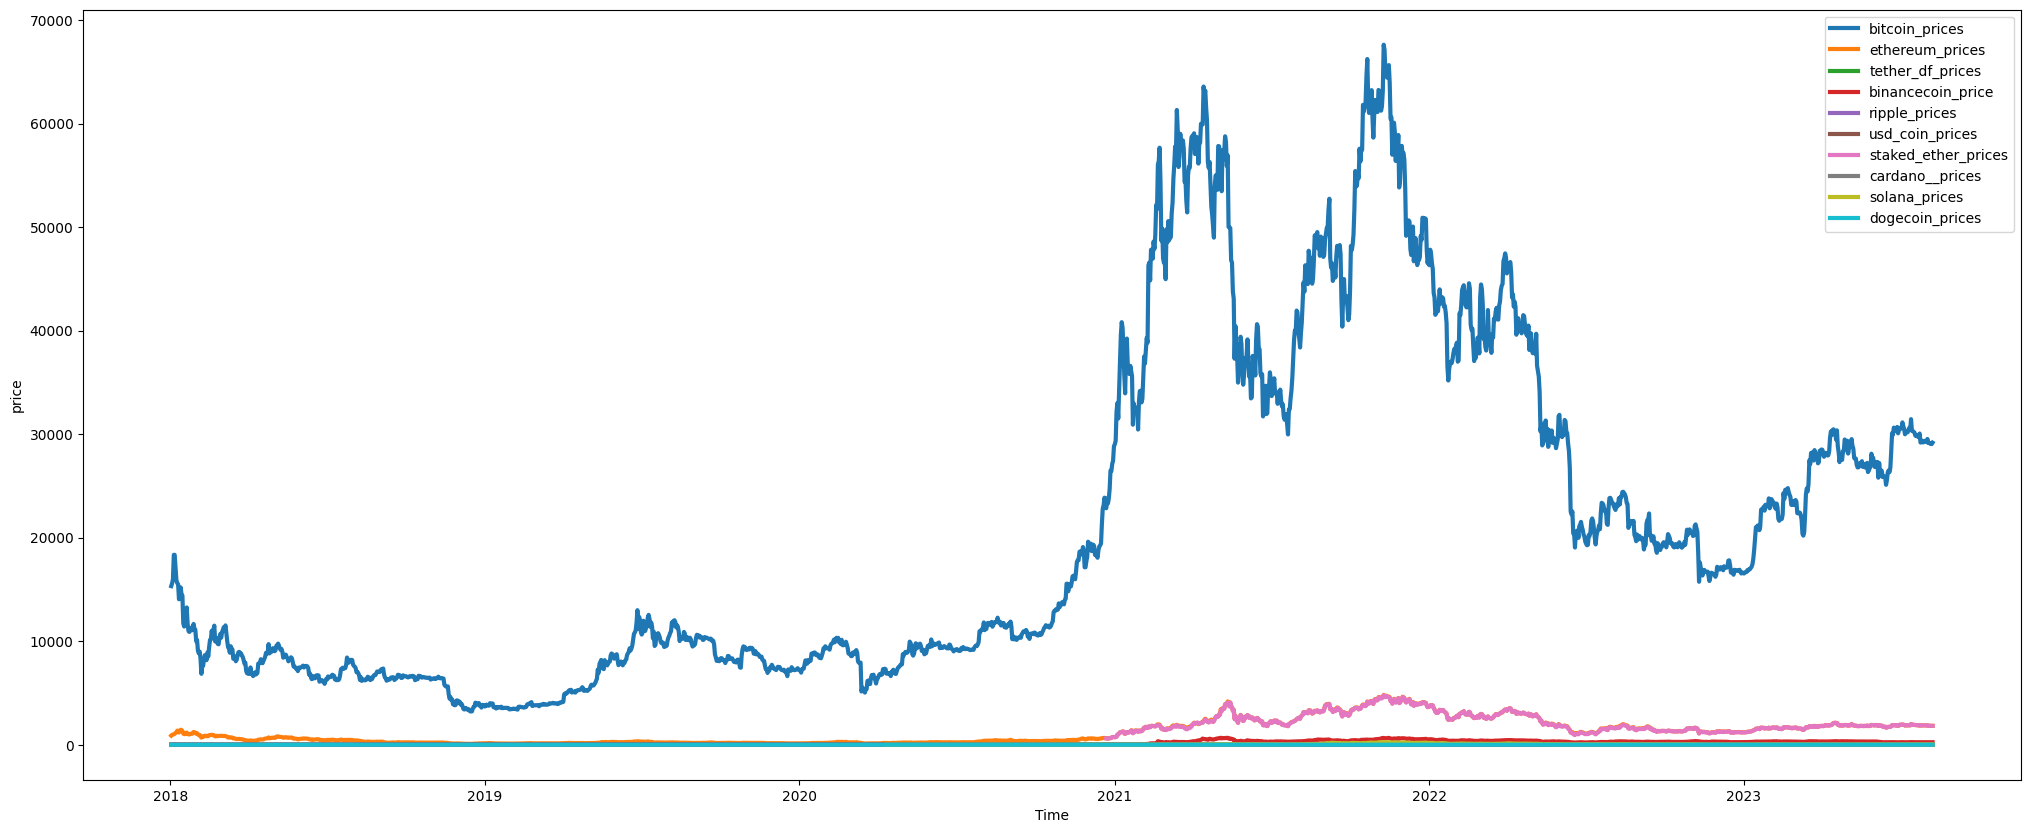

In [83]:
# I just copied the string objects listed

plot_range_dates(coin_prices_df,columns=['bitcoin_prices','ethereum_prices', 'tether_df_prices',
        'binancecoin_price', 'ripple_prices', 'usd_coin_prices',
        'staked_ether_prices', 'cardano__prices', 'solana_prices',
        'dogecoin_prices'], 
        start_date="2018-01-02", periods=2045);

At first glance:

* About outliers: it seems Bitcoin crypto coin plots an outstanding behavoir in its price. It is almost completly out of the common range, but.. what is the common range? enough far away that make other prices to look insignificant.. but just look at the Y axis os the price.. the Pink line is almost in between 0 and 10,000 usd.. may be below the 5k bucks.. that's a good monkey.. 
* About calculations: let's find the minimum and maximum of each coin, have a look at the differences (a.k.a. delta), calculate an average of that delta, and see what numbers say.
* About missin value: As it has been written in the earlier markdown, there is not any price behavior in other crypto coin but bitcoin since 2020, even the brown line for "staked_ether_prices" only appear from nowhere along with a similar ethereum behavior.. Ou.. right, you cannot see it in the above plot due to the outstanding bitcoin line.. so let's get rid of bitcoin prices by now and plot again.


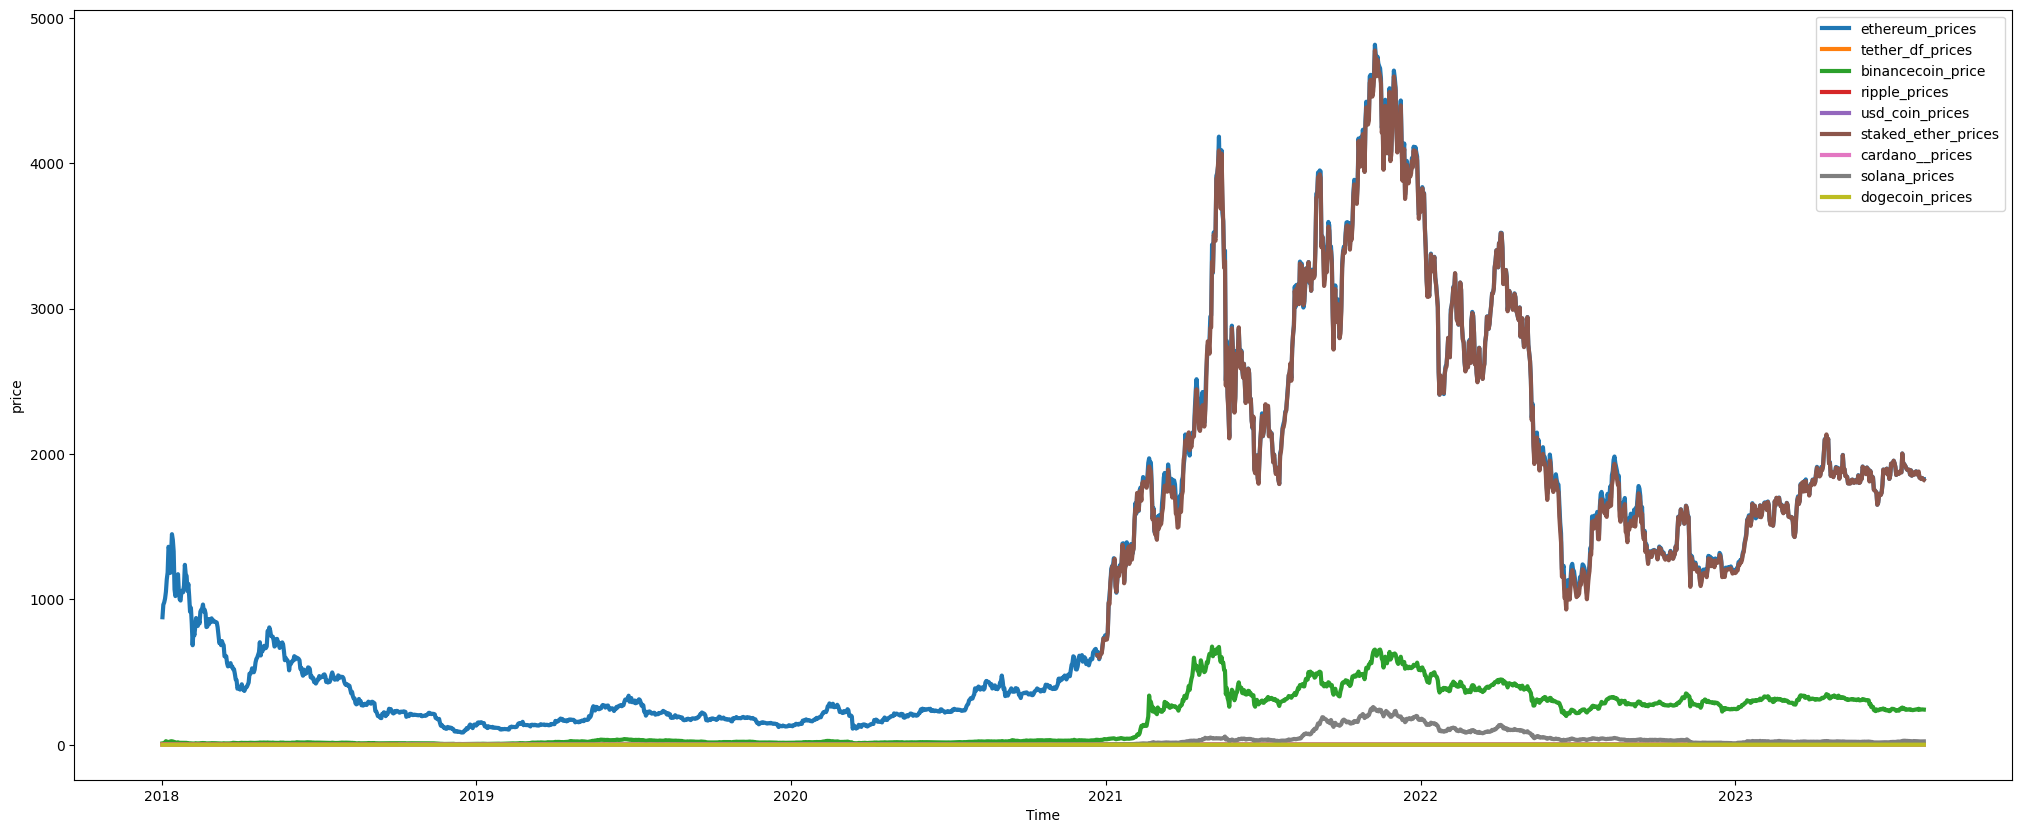

In [84]:
plot_range_dates(coin_prices_df,columns=['ethereum_prices', 'tether_df_prices',
        'binancecoin_price', 'ripple_prices', 'usd_coin_prices',
        'staked_ether_prices', 'cardano__prices', 'solana_prices',
        'dogecoin_prices'], 
        start_date="2018-01-02", periods=2045);

Why does stacked_ether_prices behaves as ethereum does? 

After googling, it seems that is only an act of depositing 32 ETH to become a vlaidator and being responsible for 

* storing data,
* processing transactions, 
* and adding new block.

Ok. so.. Are those actions vital for the crypto coin pricing? chatgpt says they are.. 

ChatGPT response:

- Yes, the actions of storing data, processing transactions, and adding new blocks are vital components of the functionality and integrity of most cryptocurrencies, including their pricing mechanisms. These actions are closely tied to the underlying blockchain technology that powers cryptocurrencies.


and what is an ETH? answer: a ethereum coin unit. 

A lot of learning with this simple searching derived from what is "skated_ether_prices"


#### Oook.. so let's make calculations 


to se what may be the min and maximum and see ranges

In [85]:
min_max_prices = coin_prices_df.iloc[:,1:].agg([np.min, np.max]).T

In [86]:
min_max_prices

,amin,amax
bitcoin_prices,3216.627150,67617.015545
ethereum_prices,83.785962,4815.004634
tether_df_prices,0.950716,1.323095
binancecoin_price,4.470332,675.098974
ripple_prices,0.137830,3.398450
usd_coin_prices,0.965578,1.043465
staked_ether_prices,596.767711,4775.452755
cardano__prices,0.023716,2.967075
solana_prices,0.513923,259.239558
dogecoin_prices,0.001483,0.681842


In [87]:
min_max_prices["delta_price"] = min_max_prices["amax"] - min_max_prices["amin"]
min_max_prices

,amin,amax,delta_price
bitcoin_prices,3216.627150,67617.015545,64400.388395
ethereum_prices,83.785962,4815.004634,4731.218672
tether_df_prices,0.950716,1.323095,0.372379
binancecoin_price,4.470332,675.098974,670.628641
ripple_prices,0.137830,3.398450,3.260620
usd_coin_prices,0.965578,1.043465,0.077886
staked_ether_prices,596.767711,4775.452755,4178.685044
cardano__prices,0.023716,2.967075,2.943359
solana_prices,0.513923,259.239558,258.725635
dogecoin_prices,0.001483,0.681842,0.680358


In [88]:
np.mean(min_max_prices["delta_price"])

7424.698099010008

 So.. in average of that delta between max and min price is $ 7424.69 .. Is that a typical case for the at least more of the half of the crypto coins in the data set? mm.. at least 5 coins their delta are below 5 bucks, 2 very below the 1k.. and wait.. one with a delta of 64k (yep, bit coin).. So this average range does not describe correctly how the coins could worth... 

In [89]:
delta_below_5usd = min_max_prices[min_max_prices["delta_price"] < 5].sort_values(by="delta_price",ascending=False)
delta_below_1k_usd = min_max_prices[(min_max_prices["delta_price"] > 5) & (min_max_prices["delta_price"] < 1001)].sort_values(by="delta_price",ascending=False)
delta_above_1k_usd = min_max_prices[(min_max_prices["delta_price"] > 1000)].sort_values(by="delta_price",ascending=False)

In [90]:
np.mean(delta_below_5usd["delta_price"]), np.mean(delta_below_1k_usd["delta_price"]), np.mean(delta_above_1k_usd["delta_price"])

(1.4669206432967, 464.67713806414645, 24436.764036918434)

In [91]:
delta_below_5usd

,amin,amax,delta_price
ripple_prices,0.137830,3.398450,3.260620
cardano__prices,0.023716,2.967075,2.943359
dogecoin_prices,0.001483,0.681842,0.680358
tether_df_prices,0.950716,1.323095,0.372379
usd_coin_prices,0.965578,1.043465,0.077886


In [92]:
delta_below_1k_usd

,amin,amax,delta_price
binancecoin_price,4.470332,675.098974,670.628641
solana_prices,0.513923,259.239558,258.725635


In [93]:
delta_above_1k_usd

,amin,amax,delta_price
bitcoin_prices,3216.627150,67617.015545,64400.388395
ethereum_prices,83.785962,4815.004634,4731.218672
staked_ether_prices,596.767711,4775.452755,4178.685044


Certainly, half of the crypto coins aren't even coming close to touching Bitcoin's heels.. so are the ones between 4k and 5k..
- Conclusion: Get rid of bitcoin for the analysis.


So let's search for growing

I want to plot the price line of the most and the least delta

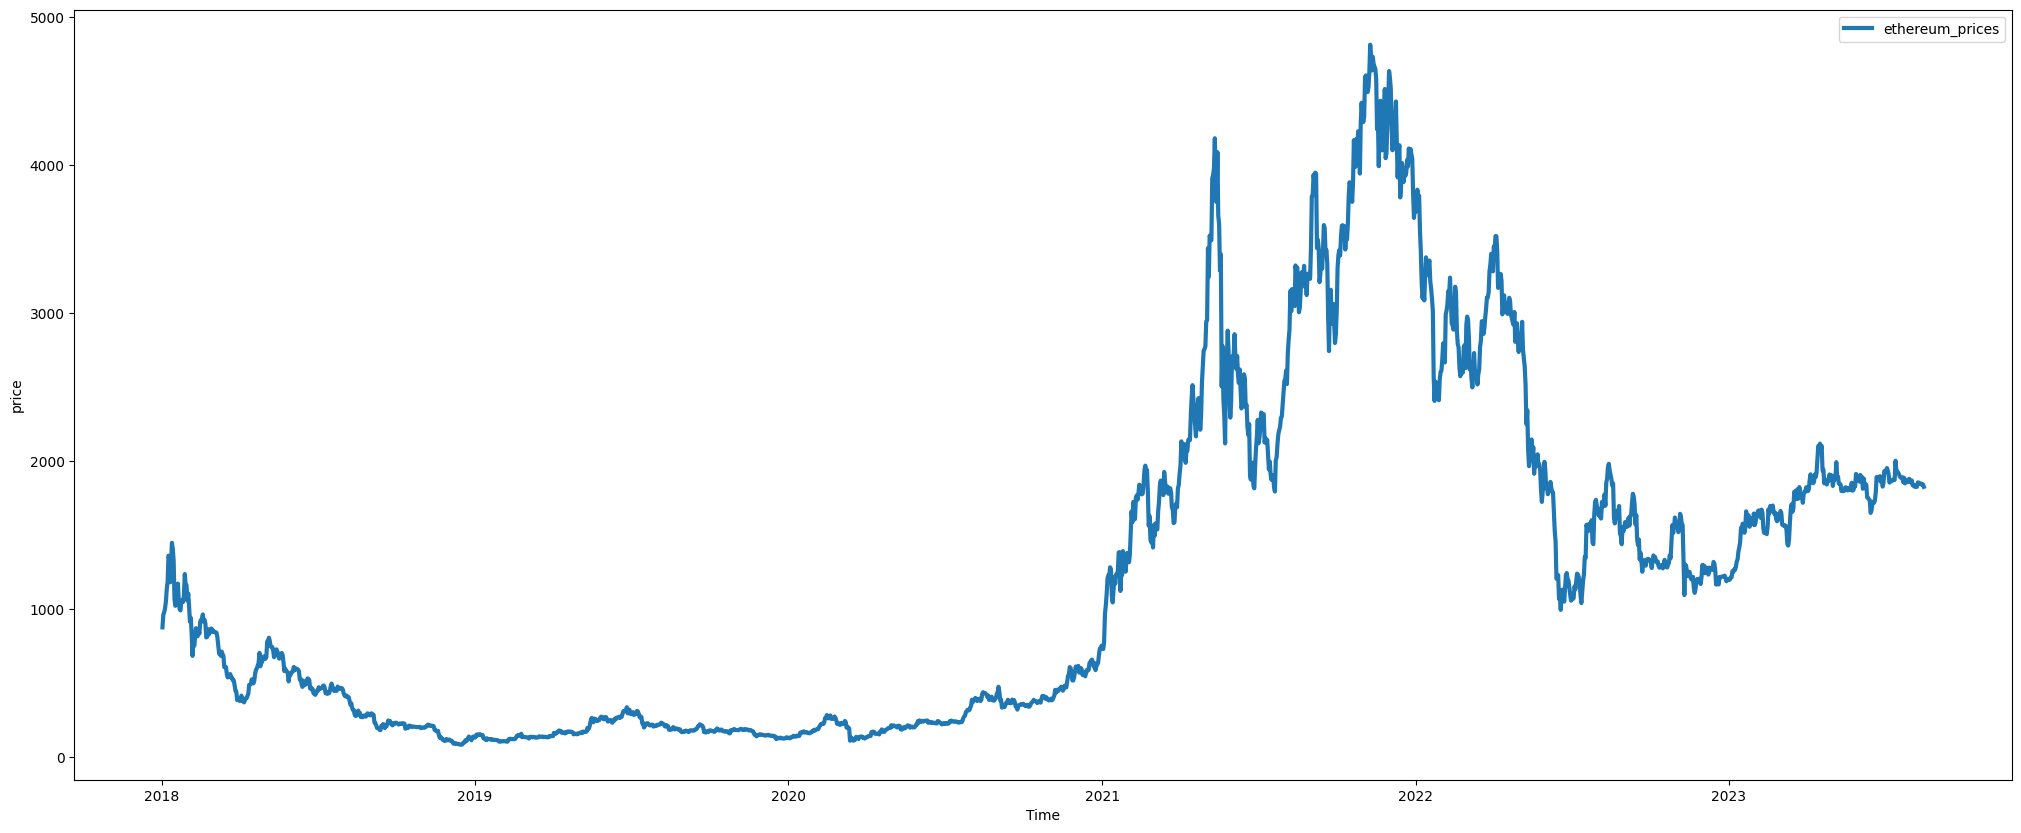

In [94]:
plot_range_dates(coin_prices_df, ["ethereum_prices"], "2018-01-01", 2054);

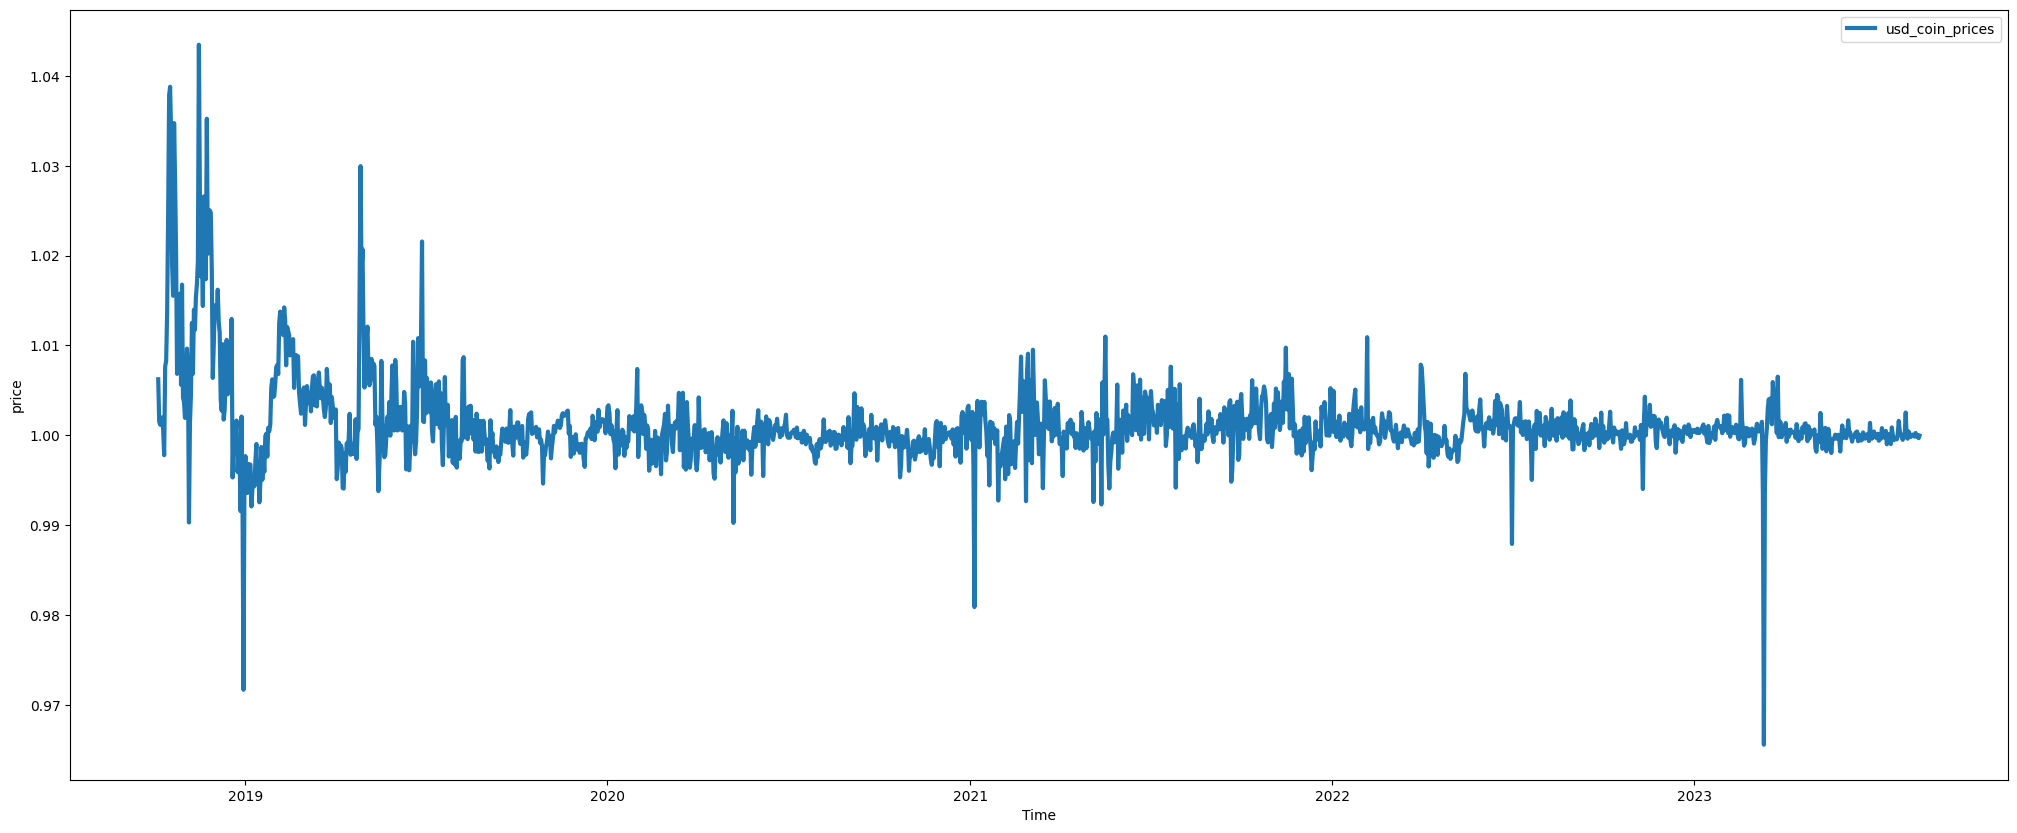

In [95]:
plot_range_dates(coin_prices_df, ["usd_coin_prices"], "2018-01-01", 2054);

Woow.. there is a remarkable activity of etheruem between 2021 and the mid of 2022 whereas usd_coin shows an "stable" behavoir.. is this a crypto coin? We have not seen a crypto remain stable so far, up until now.. 

#### What is usd_coin_prices?

Answer: it is a fully collateralised US dollar stablecoin powered by Ethereum and jointly created by Circle and Coinbase. a.k.a. an "Stablecoin" wich is designed to maintain a stable value by pegging their price to a specific reserve asset. So.. it seems this coin is not influenced by  
* storing data,
* processing transactions, 
* and adding new block.


So that means there are different "breed" of cryptocurrencies... 

#### Comparing Correlation between price, market_cap, and total volumes


- market_cap: stands for Market Capitalization which refers to the total value of a cryptocurrency's circulating supply multiplied by its current market price. It is a key indicator of a cryptocurrency's size and relative value within the broader market.

        1. Current Price is the most recent price of the cryptocurrency in a given market or exchange.
        2. Circulating Supply is the total number of units of the cryptocurrency that are actively circulating in the market. It excludes tokens that are locked, reserved, or not yet issued.


So let's dive into comparing price and market capitalization. For the next exploration, It will be 

- bitcoin dataframe as outlier analysis, 
- ethereum as "normal" case, and
- usd coin (as seen before, a coin whose value is pigged to an asset)

In [177]:
# Refreshing how original dataframes look like
bitcoin_df

,prices,market_caps,total_volumes,dates
0,15321.932852,2.570796e+11,4.130218e+09,2018-01-02
1,15583.885538,2.615052e+11,3.310356e+09,2018-01-03
2,15976.365194,2.681247e+11,4.217387e+09,2018-01-04
3,18336.922980,3.077740e+11,6.275688e+09,2018-01-05
4,18343.662493,3.079261e+11,4.240920e+09,2018-01-06
...,...,...,...,...
2050,29284.969714,5.696871e+11,4.755220e+09,2023-08-14
2051,29400.586804,5.722427e+11,1.240836e+10,2023-08-15
2052,29170.490397,5.674983e+11,1.152340e+10,2023-08-16
2053,28754.197021,5.599826e+11,1.480998e+10,2023-08-17


In [187]:
# Making a copy for testing purposes
bitcoin_df_copy = bitcoin_df.copy()

# Dates need to be in a pandas Date type for resampling data along any other king of range such as days, months, or years in the plotting function
bitcoin_df_copy["dates"] = pd.to_datetime(bitcoin_df_copy["dates"])

In [188]:
bitcoin_df_copy.set_index("dates", inplace=True)

In [214]:
def plot_2_scales(data_frame:pd.DataFrame, columns:list, intervals:str):

    """
    DataFrame must contain an index date type

    Plots 2 lines in different Y scales

    By now, provide always "prices" in the first elemnt of columns

    Intervals:
        "D": daily
        "W": weekly
        "M": monthly
        "Y": yearly 
    """

    # Sample data for the two lines

    resample_data_price = data_frame.resample(intervals).max()
    resample_data_compare = data_frame.resample(intervals).sum()

    x = resample_data_price.index

    line_1 = resample_data_price[columns[0]]
    line_2 =resample_data_compare[columns[1]]

    # Create the figure and the first y-axis
    fig, ax1 = plt.subplots(figsize=(15, 5))

    # Plot the first line
    ax1.plot(x, line_1, color='tab:blue', label=columns[0])
    ax1.set_xlabel('Time')
    ax1.set_ylabel(str(columns[0]), color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()


    # Plot the second line
    ax2.plot(x, line_2, color='tab:orange', label=columns[1], linestyle="--")
    ax2.set_ylabel(str(columns[1]), color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Add legends
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [line.get_label() for line in lines]
    plt.legend(lines, labels, loc='upper left')

    # Show the plot
    plt.title(str(columns[0])+ " vs "+str(columns[1]))
    plt.show()

#### Prices vs Total Volumes

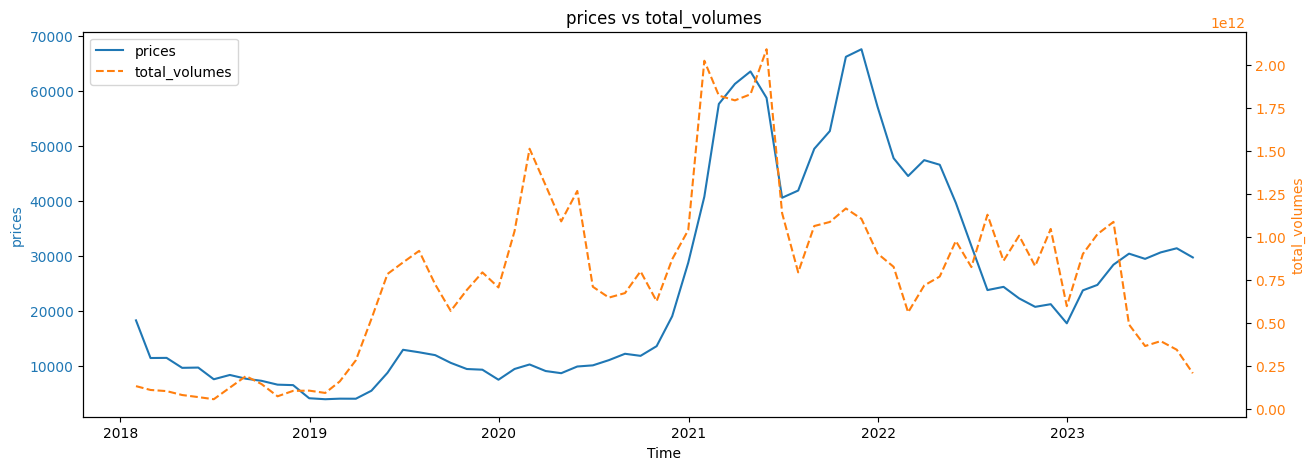

In [215]:
plot_2_scales(bitcoin_df_copy, ["prices", "total_volumes"], "M")

At first glance seems that both features are corralated.. almost, just have a look at year from 2019 to 2021.. total volume was bigger than price.. even prices remained in a "stable" range.. 

Also, what happened in 2022? bitcoin went soo down.. and may be the reason is that in the second quarter of 2022, Tesla sold more than 30k BTC for 936 millions.. almost 75% of its 1,500 million in BTC... interesting.. so, when did Tesla buy those 1,500 millions of usd in BTC?  in 2021 [click here to see the note](https://cointelegraph.com/news/spacex-sold-bitcoin-acquired-2021-2022-report).. and just look at that period... Tesla did too well


#### Prices vs Market Capitalization

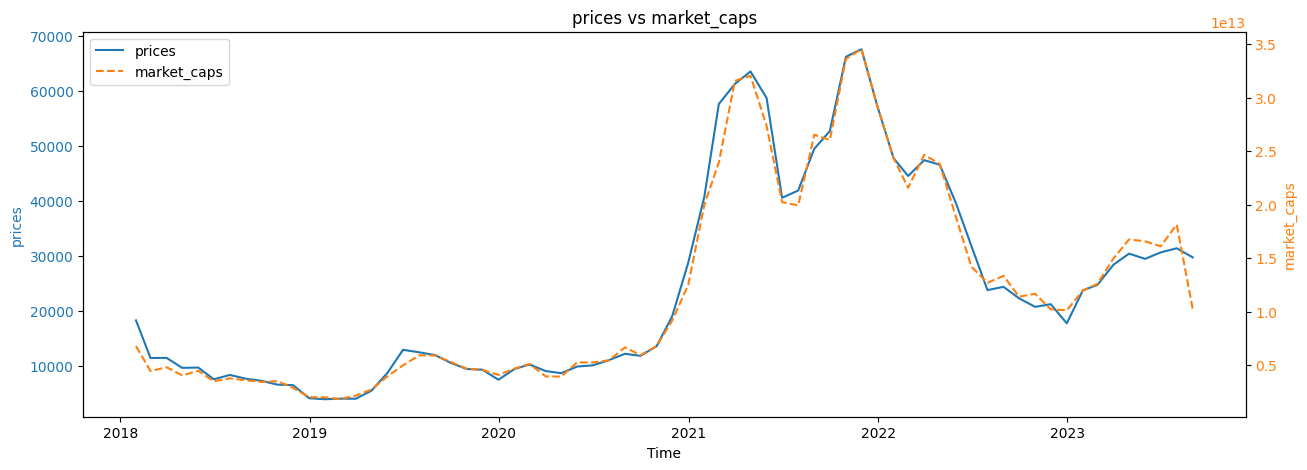

In [216]:
plot_2_scales(bitcoin_df_copy, ["prices", "market_caps"], "M")

It seems market cap and price is kind of same.. I am curiuos about this comparation for other coins

In [217]:
ethereum_df_copy = ethereum_df.copy()
ethereum_df_copy["dates"] = pd.to_datetime(ethereum_df_copy["dates"])
ethereum_df_copy.set_index("dates", inplace=True)

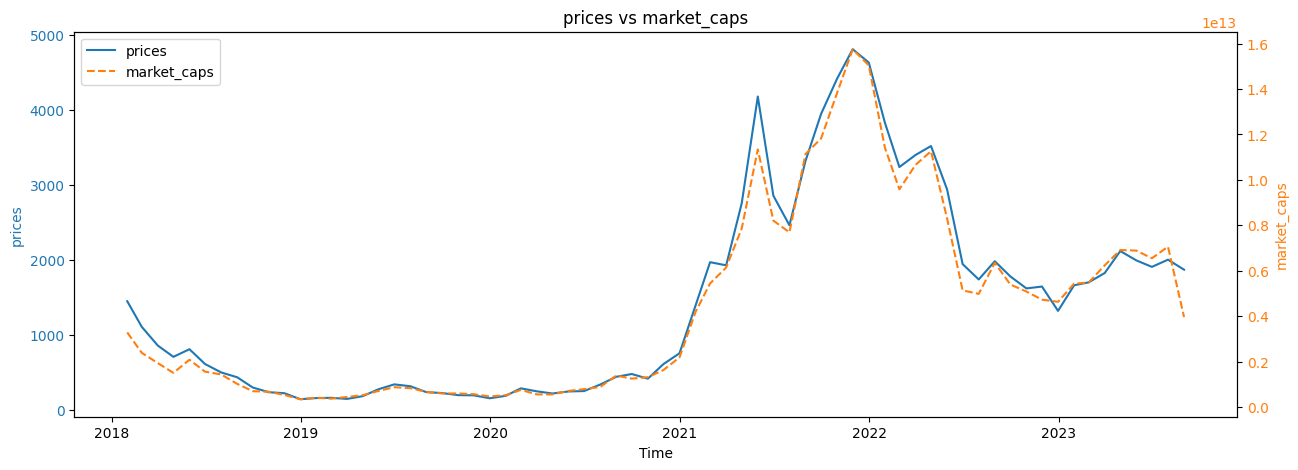

In [218]:
plot_2_scales(ethereum_df_copy, ["prices", "market_caps"], "M")

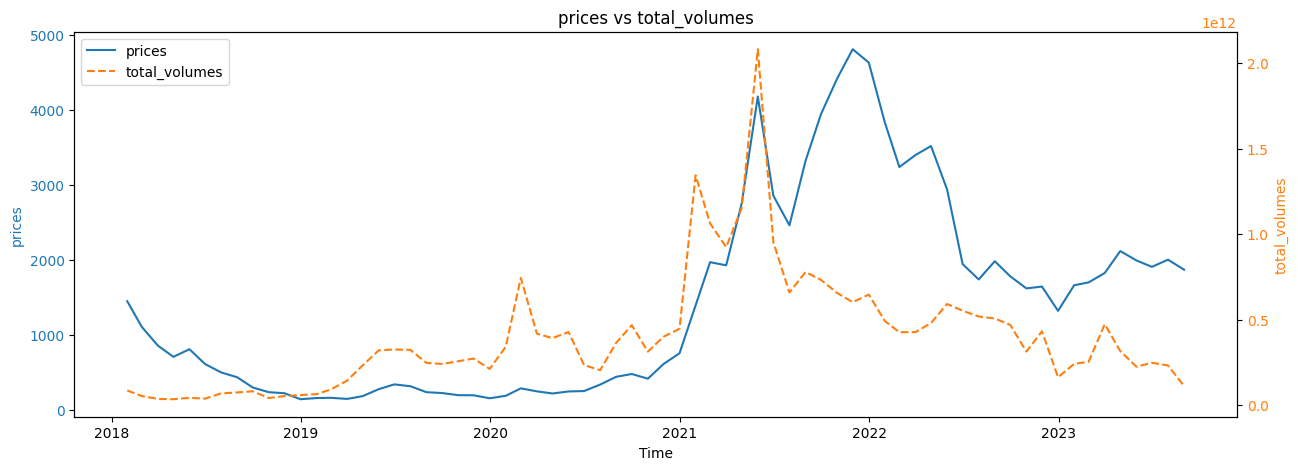

In [219]:
plot_2_scales(ethereum_df_copy, ["prices", "total_volumes"], "M")

It seems as if prices and market capitalizations were the same thing.. but both Y axis hold different values.. well, the market capitalization is the multiplication of circulating supply by the price
$$
\text{market capitalization }= \text{price} \times \text{circulatingsupply}
$$

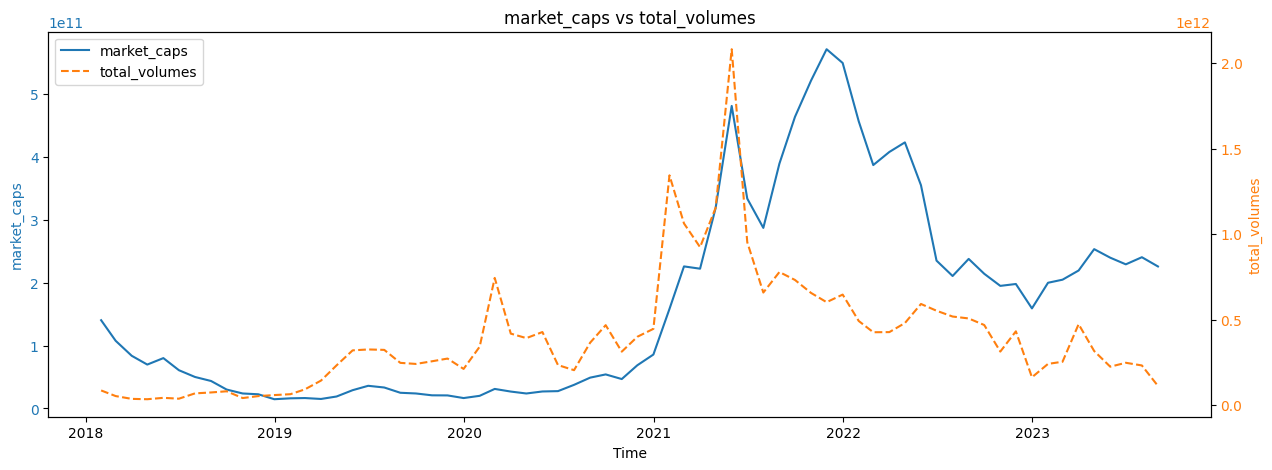

In [220]:
plot_2_scales(ethereum_df_copy, ["market_caps", "total_volumes"], "M")

For curiosity: usd coin plot

In [221]:
usd_coin_df_copy = usd_coin_df.copy()
usd_coin_df_copy["dates"] = pd.to_datetime(usd_coin_df_copy["dates"])
usd_coin_df_copy.set_index("dates", inplace=True)

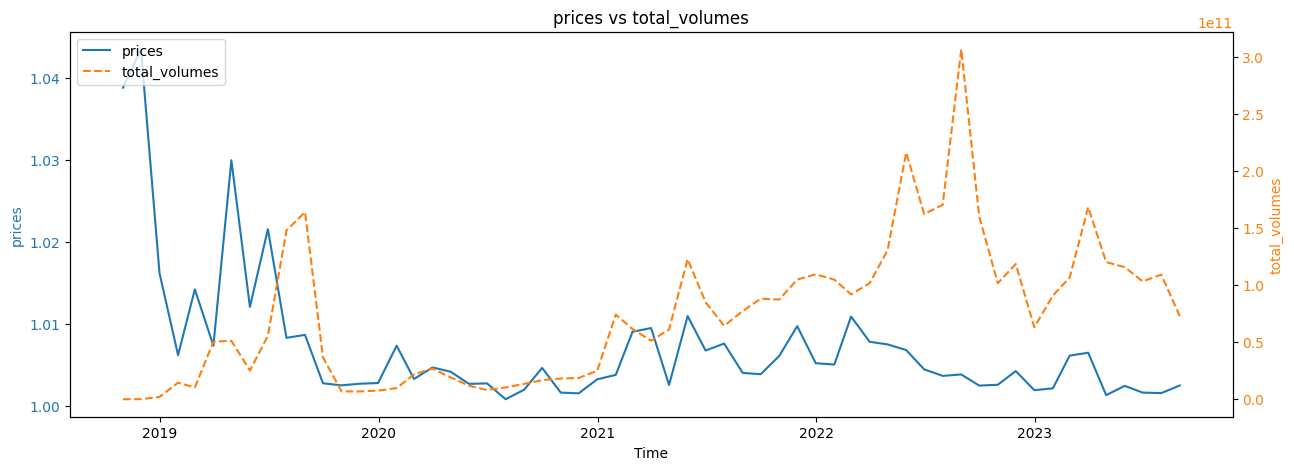

In [222]:
plot_2_scales(usd_coin_df_copy, ["prices", "total_volumes"], "M")

Interesting, as it's been shown before, usd coin's most remarkable feature is its stability... but it seems there is an positive trend since 2020 in the total volumes.. it seems people rely on things whose value is still pigged to an asset.. so do I.. 



1. **Logarithmic Returns (`log_return`)**:
   
   The formula to calculate the logarithmic return is:
   
   $$
   Logarithmic Return = \ln \left( \frac{P_t}{P_{t-1}} \right)
   $$
   
   Where:
   
   - P_t is the current price.
   - P_{t-1} is the previous price.
   

2. **Rolling Standard Deviation (`rolling_std`)**:
   
   The formula to calculate the rolling standard deviation is:
   
   Rolling Std = Standard Deviation of Logarithmic Returns over a Window
   
   This involves calculating the standard deviation of a moving window of logarithmic returns.

3. **Annualized Volatility (`Volatility`)**:
   
   The formula to annualize volatility is:
   $$
   Annualized Volatility = Rolling Std  \times \sqrt{\text{Number of Trading Days in a Year}}
   $$
   Where:
   - Rolling Std is the rolling standard deviation calculated previously.
   $$
   - \sqrt{\text{Number of Trading Days in a Year}}  accounts for the scaling of volatility over a year's trading days.
   $$

In [30]:
# # Calculate daily logaritmit returns
# bitcoin_prices["log_return"] = np.log(bitcoin_prices["prices"] / bitcoin_prices["prices"].shift(1))

# # Calculate rolling standard deviation
# bitcoin_prices["rolling_std"] = bitcoin_prices["log_return"].rolling(window=30).std()

# # Annualize volatility
# bitcoin_prices["volatility"] = bitcoin_prices["rolling_std"] * (364 ** 0.5)

C:\Users\jdieg\AppData\Local\Temp\ipykernel_18768\2292808716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_prices["log_return"] = np.log(bitcoin_prices["prices"] / bitcoin_prices["prices"].shift(1))


In [31]:
date_linspace_1 = linspace_for_dates("2018-01-01", 2055)

In [32]:
date_linspace_1

,dates
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
2050,2023-08-13
2051,2023-08-14
2052,2023-08-15
2053,2023-08-16


In [33]:
bitcoin_df.columns

Index(['prices', 'market_caps', 'total_volumes', 'dates'], dtype='object')

In [34]:
date_linspace_1 = date_linspace_1.merge(bitcoin_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "bitcoin_market_cap", "total_volumes": "bitcoin_total_volumes"})
date_linspace_1 = date_linspace_1.merge(ethereum_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "ethereum_market_cap", "total_volumes": "ethereum_total_volumes"})
date_linspace_1 = date_linspace_1.merge(tether_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "tether_df_market_cap", "total_volumes": "tether_df_total_volumes"})
date_linspace_1 = date_linspace_1.merge(binancecoin_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "binancecoinmarket_cap", "total_volumes": "binancecointotal_volumes"})
date_linspace_1 = date_linspace_1.merge(ripple_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "ripple_market_cap", "total_volumes": "ripple_total_volumes"})
date_linspace_1 = date_linspace_1.merge(usd_coin_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "usd_coin_market_cap", "total_volumes": "usd_coin_total_volumes"})
date_linspace_1 = date_linspace_1.merge(staked_ether_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "staked_ether_market_cap", "total_volumes": "staked_ether_total_volumes"})
date_linspace_1 = date_linspace_1.merge(cardano_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "cardano__market_cap", "total_volumes": "cardano__total_volumes"})
date_linspace_1 = date_linspace_1.merge(solana_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "solana_market_cap", "total_volumes": "solana_total_volumes"})
date_linspace_1 = date_linspace_1.merge(dogecoin_df[["dates", "market_caps", "total_volumes"]], on="dates", how="left").rename(columns={"market_caps": "dogecoin_market_cap", "total_volumes": "dogecoin_total_volumes"})
market_cap_and_total_vol = date_linspace_1.copy()

In [35]:
market_cap_and_total_vol.columns

Index(['dates', 'bitcoin_market_cap', 'bitcoin_total_volumes',
       'ethereum_market_cap', 'ethereum_total_volumes', 'tether_df_market_cap',
       'tether_df_total_volumes', 'binancecoinmarket_cap',
       'binancecointotal_volumes', 'ripple_market_cap', 'ripple_total_volumes',
       'usd_coin_market_cap', 'usd_coin_total_volumes',
       'staked_ether_market_cap', 'staked_ether_total_volumes',
       'cardano__market_cap', 'cardano__total_volumes', 'solana_market_cap',
       'solana_total_volumes', 'dogecoin_market_cap',
       'dogecoin_total_volumes'],
      dtype='object')

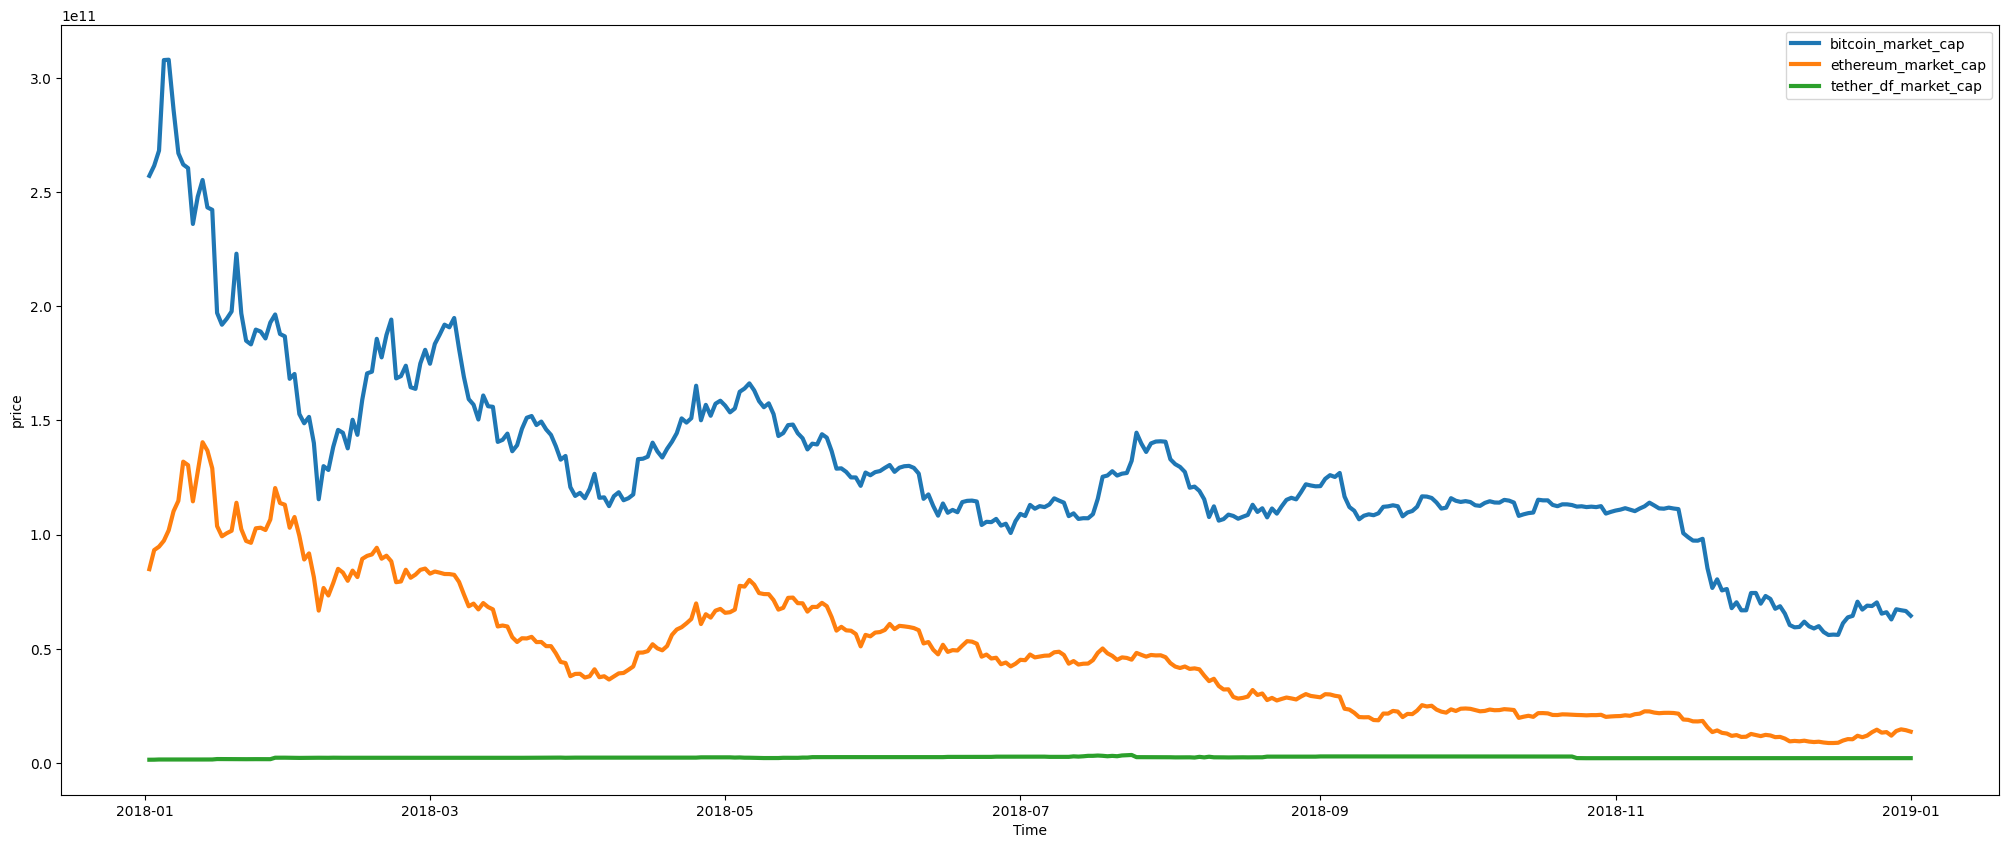

In [36]:
for year_number in range(2018, 2019):

    year_number = str(year_number)

    date_string = f'{year_number}-01-02'

    plot_range_dates(date_linspace_1, columns=['bitcoin_market_cap', 'ethereum_market_cap', 'tether_df_market_cap'], start_date=date_string, periods=365);

In [37]:
date_linspace_1.columns

Index(['dates', 'bitcoin_market_cap', 'bitcoin_total_volumes',
       'ethereum_market_cap', 'ethereum_total_volumes', 'tether_df_market_cap',
       'tether_df_total_volumes', 'binancecoinmarket_cap',
       'binancecointotal_volumes', 'ripple_market_cap', 'ripple_total_volumes',
       'usd_coin_market_cap', 'usd_coin_total_volumes',
       'staked_ether_market_cap', 'staked_ether_total_volumes',
       'cardano__market_cap', 'cardano__total_volumes', 'solana_market_cap',
       'solana_total_volumes', 'dogecoin_market_cap',
       'dogecoin_total_volumes'],
      dtype='object')

In [38]:
def marketcap_vs_totalvolumes(dataframe:pd.DataFrame, columns:list):
    return dataframe[columns].sum().plot(kind="pie", subplots=True);

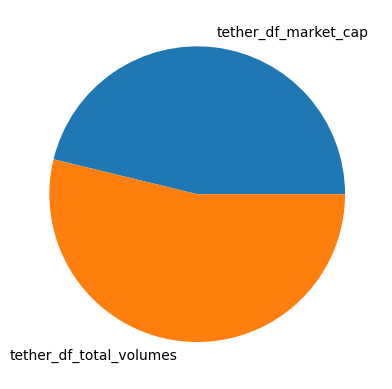

In [39]:
marketcap_vs_totalvolumes(dataframe=date_linspace_1, columns=[ 'tether_df_market_cap',
       'tether_df_total_volumes']);

In [40]:
np.log(coin_prices_df["bitcoin_prices"] / coin_prices_df["bitcoin_prices"].shift(1))

0            NaN
1            NaN
2       0.016952
3       0.024873
4       0.137806
          ...   
2049   -0.000917
2050    0.000520
2051   -0.004333
2052    0.003940
2053   -0.007857
Name: bitcoin_prices, Length: 2054, dtype: float64

In [41]:
coin_prices_df["bitcoin_prices"].rolling(window=30).std()

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2049    527.986129
2050    398.523347
2051    373.245578
2052    342.242198
2053    314.714232
Name: bitcoin_prices, Length: 2054, dtype: float64

In [42]:
bitcoin_prices =  bitcoin_df[["dates", "prices"]]

\frac{P_t}{P_{t-1}}

In [34]:
coin_prices_df

,dates,bitcoin_prices,ethereum_prices,tether_df_prices,binancecoin_price,ripple_prices,usd_coin_prices,staked_ether_prices,cardano__prices,solana_prices,dogecoin_prices
0,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-02,15321.932852,876.890259,1.003920,9.090393,2.455290,NaN,NaN,0.807430,NaN,0.009335
2,2018-01-03,15583.885538,963.055751,1.015780,9.886323,3.125710,NaN,NaN,1.075401,NaN,0.009592
3,2018-01-04,15976.365194,978.416104,1.002740,9.675758,3.220050,NaN,NaN,1.179347,NaN,0.010098
4,2018-01-05,18336.922980,1004.894972,0.999695,16.488523,2.931380,NaN,NaN,1.077821,NaN,0.013841
...,...,...,...,...,...,...,...,...,...,...,...
2049,2023-08-12,29396.847971,1847.541835,0.998938,239.595822,0.631618,1.000269,1846.298313,0.293325,24.579810,0.075714
2050,2023-08-13,29412.142275,1848.505239,0.999377,240.088445,0.627081,0.999880,1846.710998,0.291666,24.891819,0.076696
2051,2023-08-14,29284.969714,1839.512810,0.999384,240.030792,0.625689,0.999981,1837.912572,0.289372,24.223294,0.074778
2052,2023-08-15,29400.586804,1843.513391,0.998713,240.358056,0.634681,0.999688,1842.552503,0.290452,25.147725,0.074764


In [175]:
plot_range_dates(bitcoin_prices, ["volatility"], "2018-02-02", 365);

KeyError: "None of [Index(['volatility'], dtype='object')] are in the [columns]"